# Setup

In [1]:
using Plots
using BenchmarkTools

include("../spinning_compass_functions.jl")

Main.Phase_diagram

# Functions

In [2]:
function hooke(r, t, k)
    (x, v) = r
    dxdt = v
    dvdt = -k*x
    return [dxdt, dvdt]
end


"""
    RK4(eom_func, t_param, r)

Solve systems of first-order ordinary differential equations using the fourth-order Runge-Kutta method.

# Args
- eom_func (Function): function corresponding to the equations of motion to be integrated. The function must follow the format: `eom_func(r, t)`.

- time_param (Tuple): initial and final time, and number of steps of the integration. `time_param` must follow the format: `time_param = [t_initial, t_final, Npoints]`

- r (Array): initial state of the system. r must follow the same ordering of variables used in `eom_func`.

# Returns
- (tpoints, rpoints): Arrays containing the IVP solution of the EOM

# Notes
- Each row in rpoints contains the values of a particular dependent variable. To extract these values, one can either do
`xpoints = rpoints[1, :], ypoints = rpoints[2, :], ...` or `xpoints, ypoints, ... = eachrow(rpoints).` However, the latter returns SubArray objects rather than Array objects, which DOES break some functions.
"""
function RK4(eom_func::Function, t_param::Tuple{Float64, Float64, Int64}, r::Vector{Float64})

    # Initialize time array
    (t_initial, t_final, Npoints) = t_param
    h = abs(t_final - t_initial) / Npoints
    tpoints = range(t_initial, t_final, Npoints)

    # Initialize trajectory array
    rpoints = zeros(length(r), Npoints)

    # Runge-Kutta algorithm
    for (i, t) in enumerate(tpoints)
        rpoints[:, i] = r
        k1 = h*eom_func(r, t)
        k2 = h*eom_func(r .+ (0.5 .* k1), t + 0.5*h)
        k3 = h*eom_func(r .+ (0.5 .* k2), t + 0.5*h)
        k4 = h*eom_func(r .+ k3, t + h)
        r = r .+ (k1 + 2 .* k2 + 2 .* k3 + k4) / 6
    end
    return tpoints, rpoints
end


function RK4_rowmaj(eom_func::Function, t_param::Tuple{Float64, Float64, Int64}, r::Vector{Float64})

    # Initialize time array
    (t_initial, t_final, Npoints) = t_param
    h = abs(t_final - t_initial) / Npoints
    tpoints = range(t_initial, t_final, Npoints)

    # Initialize trajectory array
    rpoints = zeros(Npoints, length(r))

    # Runge-Kutta algorithm
    for (i, t) in enumerate(tpoints)
        rpoints[i, :] = r
        k1 = h*eom_func(r, t)
        k2 = h*eom_func(r .+ (0.5 .* k1), t + 0.5*h)
        k3 = h*eom_func(r .+ (0.5 .* k2), t + 0.5*h)
        k4 = h*eom_func(r .+ k3, t + h)
        r = r .+ (k1 + 2 .* k2 + 2 .* k3 + k4) / 6
    end
    return tpoints, rpoints
end

RK4_rowmaj (generic function with 1 method)

---

# Prototype 1

In [7]:
# Simulation parameters
Npoints = 1000
t_initial, t_final = 0.0, 10.0
time_param = (t_initial, t_final, Npoints)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)

f (generic function with 1 method)

Nonmodular

In [108]:
eom_func = f

# Initialize time array
(t_initial, t_final, Npoints) = time_param
h = abs(t_final - t_initial) / Npoints
tpoints = range(t_initial, t_final, Npoints)

# Initialize trajectory array
rpoints = zeros(length(r), Npoints)

# Runge-Kutta algorithm
for (i, t) in enumerate(tpoints)
    rpoints[:, i] = r
    k1 = h*eom_func(r, t)
    k2 = h*eom_func(r .+ (0.5 .* k1), t + 0.5*h)
    k3 = h*eom_func(r .+ (0.5 .* k2), t + 0.5*h)
    k4 = h*eom_func(r .+ k3, t + h)
    r = r .+ (k1 + 2 .* k2 + 2 .* k3 + k4) / 6
end

# return tpoints, rpoints
xpoints, vpoints = rpoints[1, :], rpoints[2, :]

([1.0, 0.9999500004166667, 0.9998000066665973, 0.9995500337490417, 0.9992001066610835, 0.9987502603951398, 0.9982005399354624, 0.9975510002536391, 0.9968017063030967, 0.995952733012606  …  -0.8891911529967024, -0.8845714111351448, -0.879863212869629, -0.8750670290160578, -0.8701833391888197, -0.8652126317528277, -0.860155403774683, -0.8550121609729691, -0.8497834176676798, -0.8444696967287886], [0.0, -0.009999833333333335, -0.019998666691666528, -0.02999550019999625, -0.0399893341833025, -0.049979169266515286, -0.059964006474451284, -0.06994284733171054, -0.07991469396252315, -0.08987854919053606  …  0.4575358930386186, 0.4664047797660481, 0.4752270264041781, 0.4840017507356966, 0.49272807529548296, 0.5014051274583532, 0.510032039526322, 0.518607948815372, 0.5271319977417207, 0.5356033339075792])

Modular

In [9]:
tpoints, rpoints = RK4(f, time_param, r)
xpoints, vpoints = rpoints[1, :], rpoints[2, :]

([1.0, 0.9999500004166667, 0.9998000066665973, 0.9995500337490417, 0.9992001066610835, 0.9987502603951398, 0.9982005399354624, 0.9975510002536391, 0.9968017063030967, 0.995952733012606  …  -0.8891911529967024, -0.8845714111351448, -0.879863212869629, -0.8750670290160578, -0.8701833391888197, -0.8652126317528277, -0.860155403774683, -0.8550121609729691, -0.8497834176676798, -0.8444696967287886], [0.0, -0.009999833333333335, -0.019998666691666528, -0.02999550019999625, -0.0399893341833025, -0.049979169266515286, -0.059964006474451284, -0.06994284733171054, -0.07991469396252315, -0.08987854919053606  …  0.4575358930386186, 0.4664047797660481, 0.4752270264041781, 0.4840017507356966, 0.49272807529548296, 0.5014051274583532, 0.510032039526322, 0.518607948815372, 0.5271319977417207, 0.5356033339075792])

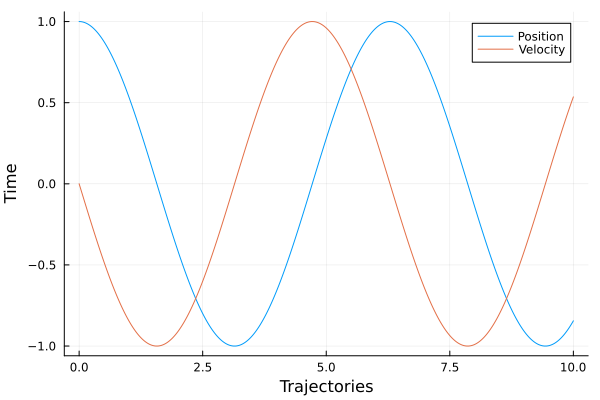

In [10]:
plot(tpoints, xpoints, label="Position")
plot!(tpoints, vpoints, label="Velocity")

xlabel!(raw"Trajectories")
ylabel!(raw"Time")

---

# Type stability

In [11]:
# Simulation parameters
Npoints = 1000
t_initial, t_final = 0.0, 10.0
time_param = (t_initial, t_final, Npoints)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)

f (generic function with 1 method)

In [12]:
@code_warntype RK4(f, time_param, r)

MethodInstance for RK4(::typeof(f), ::Tuple{Float64, Float64, Int64}, ::Vector{Float64})
  from RK4(eom_func::Function, t_param::Tuple{Float64, Float64, Int64}, r::Vector{Float64}) @ Main In[2]:33
Arguments
  #self#::Core.Const(RK4)
  eom_func::Core.Const(f)
  t_param::Tuple{Float64, Float64, Int64}
  r@_4::Vector{Float64}
Locals
  @_5::Union{Nothing, Tuple{Tuple{Int64, Float64}, Tuple{Int64, Int64}}}
  @_6::Int64
  rpoints::Matrix{Float64}
  tpoints::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}
  h::Float64
  Npoints::Int64
  t_final::Float64
  t_initial::Float64
  @_13::Int64
  t::Float64
  i::Int64
  k4::Any
  k3::Any
  k2::Any
  k1::Any
  r@_20::Any
Body::Tuple{StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}, Int64}, Matrix{Float64}}
1 ─       (r@_20 = r@_4)
│   %2  = Base.indexed_iterate(t_param, 1)::Core.PartialStruct(Tuple{Float64, Int64}, Any[Float64, Core.Const(2)])
│         (t_initial = Core.getfiel

---

# Benchmarks

In [43]:
# Simulation parameters
Npoints = 100000
t_initial, t_final = 0.0, 10.0
time_param = (t_initial, t_final, Npoints)

# Initial conditions
x0, v0 = 1.0, 0.0
r = [x0, v0]

# Function parameters
k = 1.0
f(r, t) = hooke(r, t, k)

f (generic function with 1 method)

In [46]:
@benchmark RK4(f, time_param, r)  # column-major

BenchmarkTools.Trial: 27 samples with 1 evaluation.
 Range (min … max):  167.150 ms … 386.162 ms  ┊ GC (min … max):  7.18% … 57.19%
 Time  (median):     173.925 ms               ┊ GC (median):     9.85%
 Time  (mean ± σ):   186.855 ms ±  48.120 ms  ┊ GC (mean ± σ):  15.80% ± 11.62%

   █▂                                                            
  ▅██▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▃ ▁
  167 ms           Histogram: frequency by time          386 ms <

 Memory estimate: 169.36 MiB, allocs estimate: 3799491.

In [47]:
@benchmark RK4_rowmaj(f, time_param, r)  # row-major

BenchmarkTools.Trial: 27 samples with 1 evaluation.
 Range (min … max):  169.978 ms … 385.418 ms  ┊ GC (min … max):  6.94% … 57.05%
 Time  (median):     176.148 ms               ┊ GC (median):    10.02%
 Time  (mean ± σ):   188.505 ms ±  47.856 ms  ┊ GC (mean ± σ):  15.81% ± 11.67%

  ▆█▆                                                            
  ███▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▁
  170 ms           Histogram: frequency by time          385 ms <

 Memory estimate: 169.36 MiB, allocs estimate: 3799491.

---

# Scratchpad

In [73]:
# How `zeros` and slicing column-major arrays work
Z = zeros(3, 2)
Z[:, 1] = [1, 2, 3]
Z[:, 2] = [4, 5, 6]

Z

3×2 Matrix{Float64}:
 1.0  4.0
 2.0  5.0
 3.0  6.0